In [1]:
%run lab1.ipynb

RuntimeError: This event loop is already running

RuntimeError: This event loop is already running

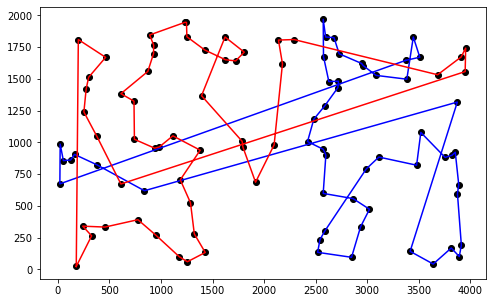

File:  kroA100.tsp 
Heuristic:  greedy_near 
Path lenght: 34344.567366575284


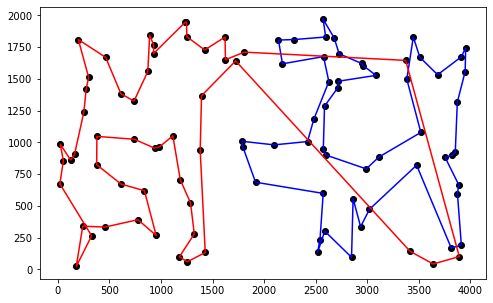

File:  kroA100.tsp 
Heuristic:  greedy_cycle 
Path lenght: 29688.61544442151


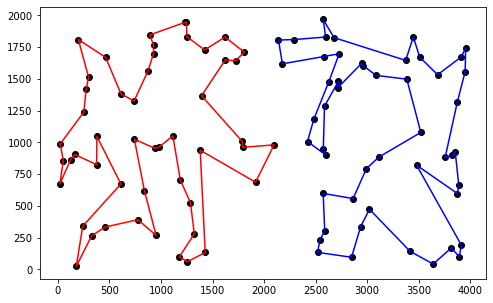

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 24535.917811057272


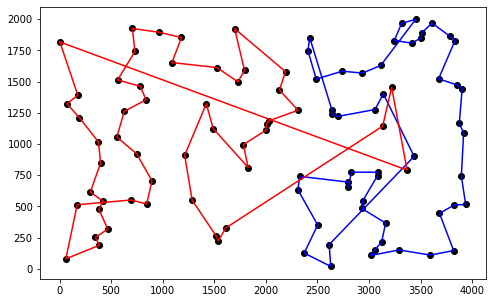

File:  kroB100.tsp 
Heuristic:  greedy_near 
Path lenght: 28707.72156514537


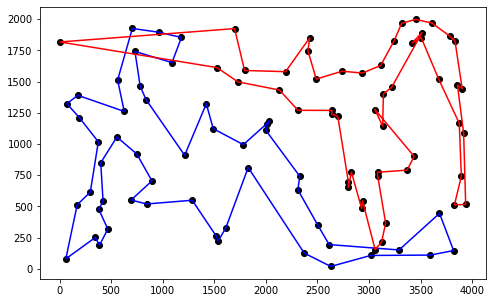

File:  kroB100.tsp 
Heuristic:  greedy_cycle 
Path lenght: 29875.274843428007


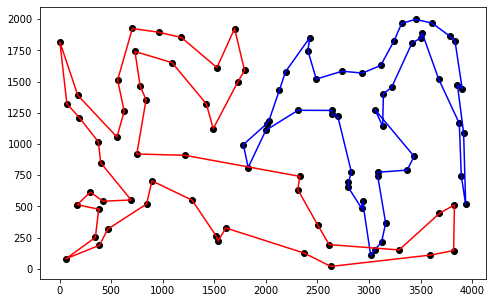

File:  kroB100.tsp 
Heuristic:  regreat_method 
Path lenght: 28332.55945630891


In [4]:
from scipy.spatial import distance
for file in ['kroA100.tsp', 'kroB100.tsp']:
    points = load_file(file)
    distances = get_distances(points)
    for heuristic in [greedy_near, greedy_cycle, regreat_method]:
        cycle1, cycle2 = heuristic(points, distances)
        heuristic_name = [name for name in globals() if globals()[name] is heuristic][0]
        draw_path(points, cycle1, cycle2, file + "_" + heuristic_name + ".jpg")
        print("File: ", file, "\nHeuristic: ", heuristic_name,
              "\nPath lenght:", cycle_lenght(distances, cycle1) + cycle_lenght(distances, cycle2))

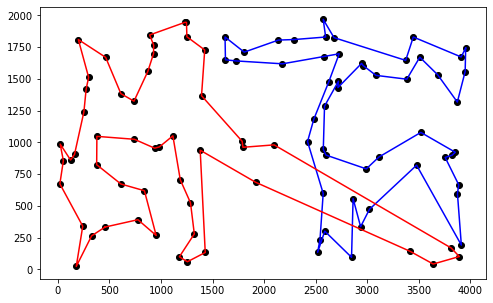

File:  kroA100.tsp 
Heuristic:  random 
Path lenght: 28453.01317239363


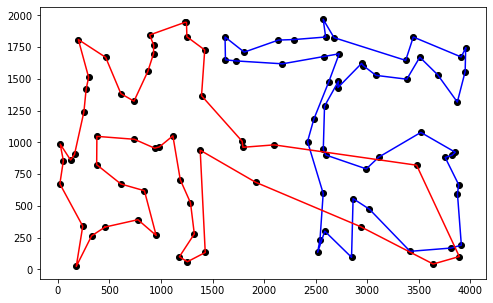

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 28133.663377209086


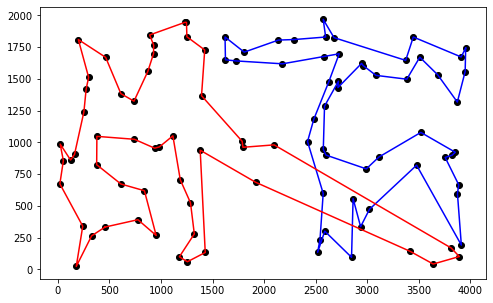

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 28453.01317239363


In [282]:
def change_vertices(cycle1, cycle2, i, j, distance):
    l1 = len(cycle1)
    l2 = len(cycle2)
    c1 = cycle1.copy()
    c2 = cycle2.copy()
    inx, inx1, inx0 = c1[i], c1[(i - 1)%l1], c1[(i + 1)%l1]
    jnx, jnx1, jnx0 = c2[j], c2[(j - 1)%l2], c2[(j + 1)%l2]
    d1 = distance[inx][inx1] + distance[inx][inx0] + distance[jnx][jnx0] + distance[jnx][jnx1]
    d2 = distance[jnx][inx1] + distance[jnx][inx0] + distance[inx][jnx0] + distance[inx][jnx1]
    c1[i], c2[j] = c2[j], c1[i]
    return c1, c2, d1 - d2  

points = load_file('kroA100.tsp')
distances = get_distances(points)
cycle1, cycle2 = regreat_method(points, distances)
draw_path(points, cycle1, cycle2, "123.jpg")
print("File: ", 'kroA100.tsp', "\nHeuristic: ", "random",
      "\nPath lenght:", cycle_lenght(distances, cycle1) + cycle_lenght(distances, cycle2))
    

path = cycle_lenght(distances, cycle1) + cycle_lenght(distances, cycle2)
cycle_new1, cycle_new2 = cycle1.copy(), cycle2.copy()

def greedy_outer_vertexy(cycle_copy, cycle1, cycle2):
    deltha = 0
    while(len(cycle_copy)):
        a = np.random.choice(cycle_copy, size=1, replace = False)
        index = np.where(cycle_copy == a)[0][0]
        cycle_copy = np.delete(cycle_copy, index)
        for i in range(len(cycle2)): 
            c1, c2, d = change_vertices(cycle1, cycle2, index, i, distances)
            if d > 0.0:
                return c1, c2
    return [], []

def steepest_outer_vertexy(cycle_copy, cycle1, cycle2):
    deltha = 0.0
    c1_ret, c2_ret = [], []
    while(len(cycle_copy)):
        a = np.random.choice(cycle_copy, size=1, replace = False)
        index = np.where(cycle_copy == a)[0][0]
        cycle_copy = np.delete(cycle_copy, index)
        for i in range(len(cycle2)): 
            c1, c2, d = change_vertices(cycle1, cycle2, index, i, distances)
            if d > deltha:
                deltha = d
                c1_ret, c2_ret = c1, c2
    return c1_ret, c2_ret

def greedy_outer(cycle_new1, cycle_new2):
    cycle_new1_ret, cycle_new2_ret = cycle_new1.copy(), cycle_new2.copy()
    while(True):
        cycle_copy = np.array(cycle_new1.copy())
        c1, c2 = greedy_outer_vertexy(cycle_copy, cycle_new1, cycle_new2)
        if c1 == []:
            break
        cycle_new1_ret, cycle_new2_ret = cycle_new1, cycle_new2 = c1, c2
    return cycle_new1_ret, cycle_new2_ret

def steepest_outer(cycle_new1, cycle_new2):
    cycle_new1_ret, cycle_new2_ret = cycle_new1.copy(), cycle_new2.copy()
    while(True):
        cycle_copy = np.array(cycle_new1.copy())
        c1, c2 = steepest_outer_vertexy(cycle_copy, cycle_new1, cycle_new2)
        if c1 == []:
            break
        cycle_new1_ret, cycle_new2_ret = cycle_new1, cycle_new2 = c1, c2
    return cycle_new1_ret, cycle_new2_ret
    
a, b = greedy_outer(cycle_new1, cycle_new2)
draw_path(points, a, b, file + "_" + heuristic_name + ".jpg")
print("File: ", 'kroA100.tsp', "\nHeuristic: ", heuristic_name,
      "\nPath lenght:", cycle_lenght(distances, a) + cycle_lenght(distances, b))
c, d = steepest_outer(cycle_new1, cycle_new2)

draw_path(points, c, d, file + "_" + heuristic_name + ".jpg")
print("File: ", 'kroA100.tsp', "\nHeuristic: ", heuristic_name,
      "\nPath lenght:", cycle_lenght(distances, c) + cycle_lenght(distances, d))    

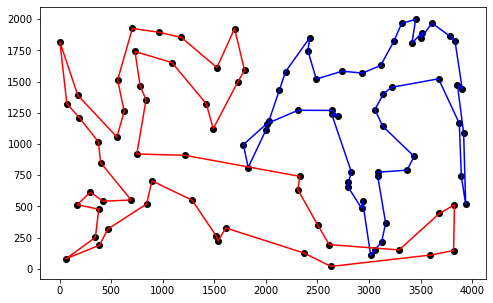

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 28051.19453519395


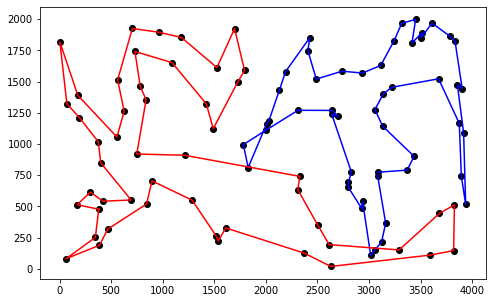

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 28044.881986148197


In [280]:
def change_vertices_inside(cycle1, i, j, distance):
    if(abs(i-j) == 1):
        return [], 0.0
    l1 = len(cycle1)
    c1 = cycle1.copy()
    inx, inx1, inx0 = c1[i], c1[(i - 1)%l1], c1[(i + 1)%l1]
    jnx, jnx1, jnx0 = c1[j], c1[(j - 1)%l1], c1[(j + 1)%l1]
    d1 = distance[inx][inx1] + distance[inx][inx0] + distance[jnx][jnx0] + distance[jnx][jnx1]
    d2 = distance[jnx][inx1] + distance[jnx][inx0] + distance[inx][jnx0] + distance[inx][jnx1]
    c1[i], c1[j] = c1[j], c1[i]
    return c1, d1 - d2

import random 
def greedy_inner_vertexy(cycle1_copy, cycle2_copy, cycle1, cycle2):
    deltha = 0
    choose = [cycle1_copy, cycle2_copy]
    return_arrays = [cycle1.copy(), cycle2.copy()]
    choose_array = [0, 1]
    while(len(choose_array)):
        if len(choose) == 2:
            ind = random.choice(choose_array)
        if len(choose) == 1:
            ind = 0
        if len(choose[ind]) == 0:
            choose_array.remove(ind)
            continue
        a = np.random.choice(choose[ind], size=1, replace = False)
        index = np.where(choose[ind] == a)[0][0]
        choose[ind] = np.delete(choose[ind], index)
        for i in range(len(choose[ind])): 
            if choose[ind][i] == a:
                continue
            c1, d = change_vertices_inside(return_arrays[ind], index, i, distances)
            if d > 0.0:
                return_arrays[ind] = c1
                return return_arrays
    return [], []


def steepest_inner_vertexy(cycle1_copy, cycle2_copy, cycle1, cycle2):
    deltha = 0
    choose = [cycle1_copy, cycle2_copy]
    return_arrays = [cycle1.copy(), cycle2.copy()]
    choose_array = [0, 1]
    c1_ret, c2_ret = [], []
    while(len(choose_array)):
        if len(choose) == 2:
            ind = random.choice(choose_array)
        if len(choose) == 1:
            ind = 0
        if len(choose[ind]) == 0:
            choose_array.remove(ind)
            continue
        a = np.random.choice(choose[ind], size=1, replace = False)
        index = np.where(choose[ind] == a)[0][0]
        choose[ind] = np.delete(choose[ind], index)
        for i in range(len(choose[ind])): 
            if choose[ind][i] == a:
                continue
            c1, d = change_vertices_inside(return_arrays[ind], index, i, distances)
            if d > deltha:
                deltha = d
                return_arrays[ind] = c1
                c1_ret, c2_ret = return_arrays
    return c1_ret, c2_ret


cycle_new1, cycle_new2 = cycle1.copy(), cycle2.copy()

def greedy_inner_ver(cycle_new1, cycle_new2):
    cycle_new1_ret, cycle_new2_ret = cycle_new1.copy(), cycle_new2.copy()
    while(True):
        cycle1_copy = np.array(cycle_new1.copy())
        cycle2_copy = np.array(cycle_new2.copy())
        c1, c2 = greedy_inner_vertexy(cycle1_copy, cycle2_copy, cycle_new1, cycle_new2)
        if c1 == []:
            break
        cycle_new1_ret, cycle_new2_ret = cycle_new1, cycle_new2 = c1, c2   
    return cycle_new1_ret, cycle_new2_ret

e, f = greedy_inner_ver(cycle_new1, cycle_new2)
draw_path(points, e, f, file + "_" + heuristic_name + ".jpg")
print("File: ", 'kroA100.tsp', "\nHeuristic: ", heuristic_name,
      "\nPath lenght:", cycle_lenght(distances, e) + cycle_lenght(distances, f))

def steepest_inner_ver(cycle_new1, cycle_new2):
    cycle_new1_ret, cycle_new2_ret = cycle_new1.copy(), cycle_new2.copy()
    while(True):
        cycle1_copy = np.array(cycle_new1.copy())
        cycle2_copy = np.array(cycle_new2.copy())
        c1, c2 = steepest_inner_vertexy(cycle1_copy, cycle2_copy, cycle_new1, cycle_new2)
        if c1 == []:
            break
        cycle_new1_ret, cycle_new2_ret = cycle_new1, cycle_new2 = c1, c2   
    return cycle_new1_ret, cycle_new2_ret

g, h = steepest_inner_ver(cycle_new1, cycle_new2)
draw_path(points, g, h, file + "_" + heuristic_name + ".jpg")
print("File: ", 'kroA100.tsp', "\nHeuristic: ", heuristic_name,
      "\nPath lenght:", cycle_lenght(distances, g) + cycle_lenght(distances, h))    

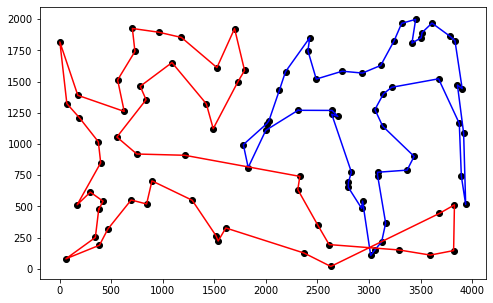

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 27271.464341682542


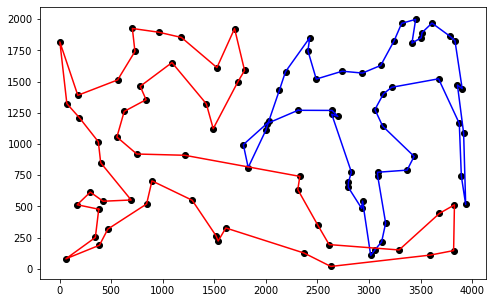

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 27392.704507486447


In [281]:
def change_edges_inside(cycle, i, j, distance):
    if(abs(i-j) <= 2 or abs(i-j) > 49):
        return [], 0.0
    if i > j:
        i, j = j, i
    l1 = len(cycle)
    c1 = cycle.copy()
    inx, inx1 = c1[i], c1[(i + 1)%l1]
    jnx, jnx1 = c1[j], c1[(j + 1)%l1]
    d1 = distance[inx][inx1] + distance[jnx][jnx1]
    d2 = distance[inx][jnx] + distance[jnx1][inx1]
    c1[(i + 1)%l1 + 1:j] = c1[(i + 1)%l1 + 1:j][::-1]
    c1[(i + 1)%l1], c1[j] = c1[j], c1[(i + 1)%l1]
    return c1, d1 - d2


def greedy_inner_edges(cycle1_copy, cycle2_copy, cycle1, cycle2):
    deltha = 0
    choose = [cycle1_copy, cycle2_copy]
    return_arrays = [cycle1.copy(), cycle2.copy()]
    choose_array = [0, 1]
    while(len(choose_array)):
        if len(choose) == 2:
            ind = random.choice(choose_array)
        if len(choose) == 1:
            ind = 0
        if len(choose[ind]) == 0:
            choose_array.remove(ind)
            continue
        a = np.random.choice(choose[ind], size=1, replace = False)
        index = np.where(choose[ind] == a)[0][0]
        choose[ind] = np.delete(choose[ind], index)
        for i in range(len(choose[ind])): 
            if choose[ind][i] == a:
                continue
            c1, d = change_edges_inside(return_arrays[ind], index, i, distances)
            if d > 0.0:
                return_arrays[ind] = c1
                return return_arrays
    return [], []

def steepest_inner_vertexy(cycle1_copy, cycle2_copy, cycle1, cycle2):
    deltha = 0
    choose = [cycle1_copy, cycle2_copy]
    return_arrays = [cycle1.copy(), cycle2.copy()]
    choose_array = [0, 1]
    c1_ret, c2_ret = [], []
    while(len(choose_array)):
        if len(choose) == 2:
            ind = random.choice(choose_array)
        if len(choose) == 1:
            ind = 0
        if len(choose[ind]) == 0:
            choose_array.remove(ind)
            continue
        a = np.random.choice(choose[ind], size=1, replace = False)
        index = np.where(choose[ind] == a)[0][0]
        choose[ind] = np.delete(choose[ind], index)
        for i in range(len(choose[ind])): 
            if choose[ind][i] == a:
                continue
            c1, d = change_edges_inside(return_arrays[ind], index, i, distances)
            if d > deltha:
                deltha = d
                return_arrays[ind] = c1
                c1_ret, c2_ret = return_arrays
    return c1_ret, c2_ret

def greedy_inner_edg(cycle_new1, cycle_new2):
    cycle_new1_ret, cycle_new2_ret = cycle_new1.copy(), cycle_new2.copy()
    while(True):
        cycle1_copy = np.array(cycle_new1.copy())
        cycle2_copy = np.array(cycle_new2.copy())
        c1, c2 = greedy_inner_edges(cycle1_copy, cycle2_copy, cycle_new1, cycle_new2)
        if c1 == []:
            break
        cycle_new1_ret, cycle_new2_ret = cycle_new1, cycle_new2 = c1, c2  
    return cycle_new1_ret, cycle_new2_ret

i, j = greedy_inner(cycle_new1, cycle_new2)
draw_path(points, i, j, file + "_" + heuristic_name + ".jpg")
print("File: ", 'kroA100.tsp', "\nHeuristic: ", heuristic_name,
      "\nPath lenght:", cycle_lenght(distances, i) + cycle_lenght(distances, j))


def steepest_inner_edg(cycle_new1, cycle_new2):
    cycle_new1_ret, cycle_new2_ret = cycle_new1.copy(), cycle_new2.copy()
    while(True):
        cycle1_copy = np.array(cycle_new1.copy())
        cycle2_copy = np.array(cycle_new2.copy())
        c1, c2 = steepest_inner_vertexy(cycle1_copy, cycle2_copy, cycle_new1, cycle_new2)
        if c1 == []:
            break
        cycle_new1_ret, cycle_new2_ret = cycle_new1, cycle_new2 = c1, c2
    return cycle_new1_ret, cycle_new2_ret

k, l = steepest_inner(cycle_new1, cycle_new2)
draw_path(points, k, l, file + "_" + heuristic_name + ".jpg")
print("File: ", 'kroA100.tsp', "\nHeuristic: ", heuristic_name,
      "\nPath lenght:", cycle_lenght(distances, k) + cycle_lenght(distances, l))

0
10
20
30
40
50
60
70
80
90
('none', 'kroA100.tsp') 24159.154861037678


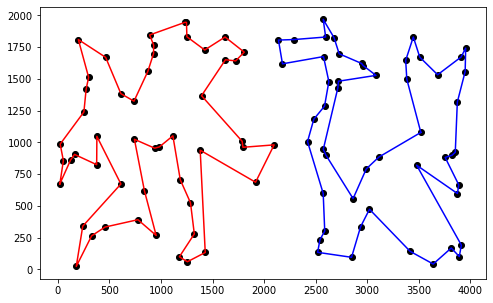

('greedy_outer', 'kroA100.tsp') 24159.154861037678


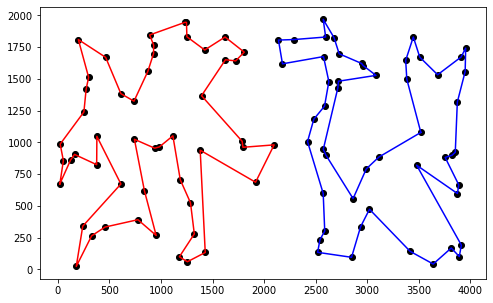

('steepest_outer', 'kroA100.tsp') 24159.154861037678


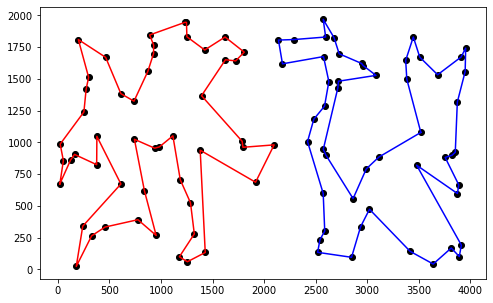

('greedy_inner_ver', 'kroA100.tsp') 23900.113536496698


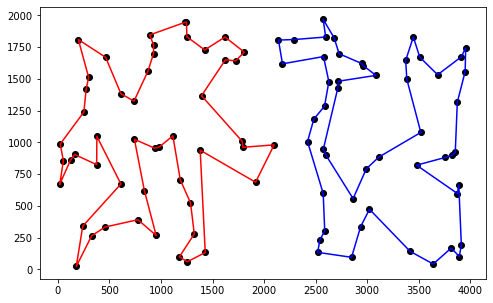

('steepest_inner_ver', 'kroA100.tsp') 23178.61605333496


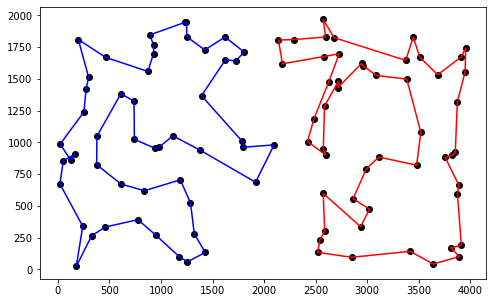

('greedy_inner_edg', 'kroA100.tsp') 23246.85131164984


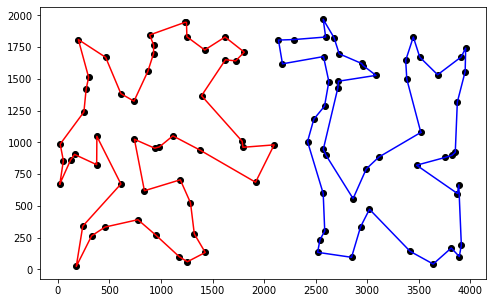

('steepest_inner_edg', 'kroA100.tsp') 23314.829713199386


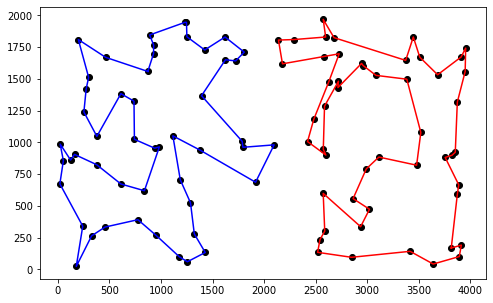

('none', 'kroB100.tsp') 23998.855996872047


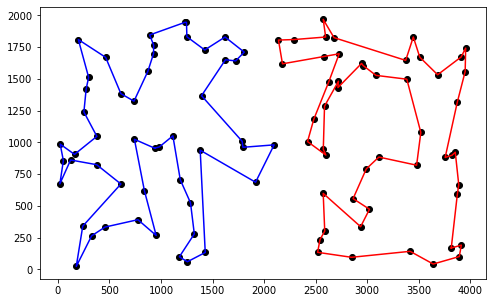

('greedy_outer', 'kroB100.tsp') 23998.855996872047


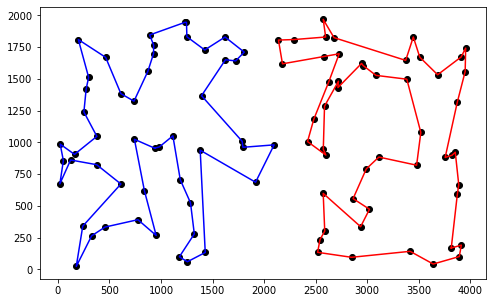

('steepest_outer', 'kroB100.tsp') 23998.855996872047


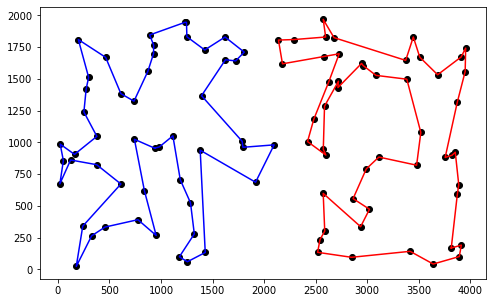

('greedy_inner_ver', 'kroB100.tsp') 23936.577276028835


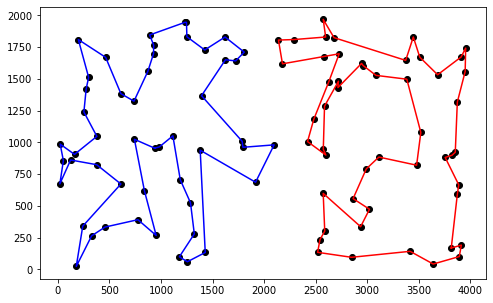

('steepest_inner_ver', 'kroB100.tsp') 23156.34848722077


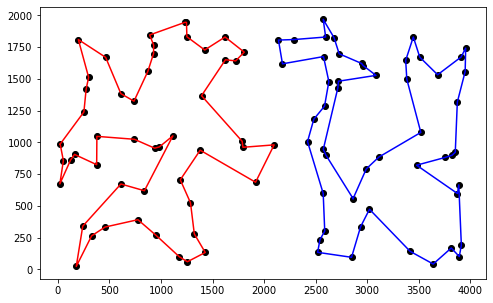

('greedy_inner_edg', 'kroB100.tsp') 23354.251421599314


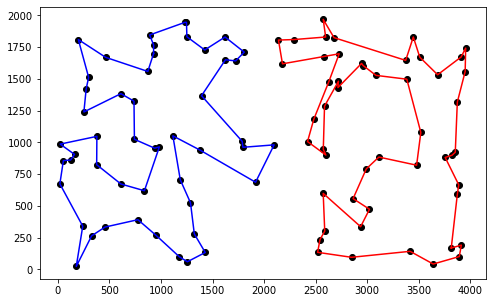

('steepest_inner_edg', 'kroB100.tsp') 23268.54366421004


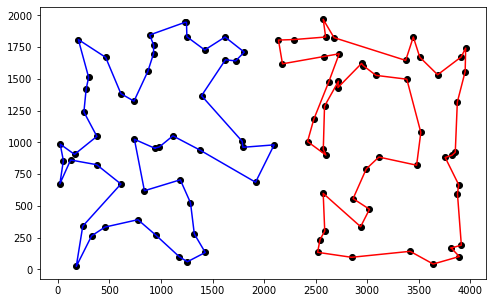

,none,greedy_outer,steepest_outer,greedy_inner_ver,steepest_inner_ver,greedy_inner_edg,steepest_inner_edg,none,greedy_outer,steepest_outer,greedy_inner_ver,steepest_inner_ver,greedy_inner_edg,steepest_inner_edg
,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,27535.454506,27189.352641,27058.499457,27437.974810,27139.554571,27161.694475,27165.848577,27302.165784,27012.773389,26825.778496,27219.593632,26920.731838,27005.940275,26956.955523
std,1596.975616,1498.603399,1456.758831,1576.450001,1632.734315,1626.008655,1604.241865,1723.261732,1609.149614,1562.195851,1717.085803,1825.514007,1751.592775,1778.255516
min,24159.154861,24159.154861,24159.154861,23900.113536,23178.616053,23246.851312,23314.829713,23998.855997,23998.855997,23998.855997,23936.577276,23156.348487,23354.251422,23268.543664
25%,27359.343590,26229.260509,25923.279323,27288.918070,27264.477672,27264.477672,27288.918070,25246.411817,25246.411817,25246.411817,25184.133096,25180.308940,25184.133096,25184.133096
50%,28201.507256,27849.680266,27596.304909,28168.719260,27923.652446,27923.652446,27923.456062,28201.507256,27865.219620,27425.548415,28108.621033,27933.108227,27923.259678,27923.259678
75%,28490.896380,28220.865343,28170.909319,28470.947763,28204.261245,28199.141713,28204.688604,28453.013172,28201.507256,28174.794157,28373.313489,28168.095040,28157.523304,28127.925362
max,29408.701184,29408.701184,29275.765705,29213.611790,28776.763984,28909.699463,28667.881956,30189.625596,29275.765705,29408.701184,30094.759678,29012.956332,29346.547269,29012.956332


In [297]:
import time

results = {
    ('none', 'kroA100.tsp')  : [],
    ('greedy_outer', 'kroA100.tsp')  : [],
    ('steepest_outer', 'kroA100.tsp') : [],
    ('greedy_inner_ver', 'kroA100.tsp'): [],
    ('steepest_inner_ver', 'kroA100.tsp')  : [],
    ('greedy_inner_edg', 'kroA100.tsp') : [],
    ('steepest_inner_edg', 'kroA100.tsp'): [], 
    ('none', 'kroB100.tsp')  : [],
    ('greedy_outer', 'kroB100.tsp')  : [],
    ('steepest_outer', 'kroB100.tsp') : [],
    ('greedy_inner_ver', 'kroB100.tsp'): [],
    ('steepest_inner_ver', 'kroB100.tsp')  : [],
    ('greedy_inner_edg', 'kroB100.tsp') : [],
    ('steepest_inner_edg', 'kroB100.tsp'): [], 
}

time_val = {
    ('greedy_outer', 'kroA100.tsp')  : [],
    ('steepest_outer', 'kroA100.tsp') : [],
    ('greedy_inner_ver', 'kroA100.tsp'): [],
    ('steepest_inner_ver', 'kroA100.tsp')  : [],
    ('greedy_inner_edg', 'kroA100.tsp') : [],
    ('steepest_inner_edg', 'kroA100.tsp'): [], 
    ('greedy_outer', 'kroB100.tsp')  : [],
    ('steepest_outer', 'kroB100.tsp') : [],
    ('greedy_inner_ver', 'kroB100.tsp'): [],
    ('steepest_inner_ver', 'kroB100.tsp')  : [],
    ('greedy_inner_edg', 'kroB100.tsp') : [],
    ('steepest_inner_edg', 'kroB100.tsp'): [], 
}

min_cycles = {
    ('none', 'kroA100.tsp')  : [None, None],
    ('greedy_outer', 'kroA100.tsp')  : [None, None],
    ('steepest_outer', 'kroA100.tsp') : [None, None],
    ('greedy_inner_ver', 'kroA100.tsp'): [None, None],
    ('steepest_inner_ver', 'kroA100.tsp')  : [None, None],
    ('greedy_inner_edg', 'kroA100.tsp') : [None, None],
    ('steepest_inner_edg', 'kroA100.tsp'): [None, None],
    ('none', 'kroB100.tsp')  : [None, None], 
    ('greedy_outer', 'kroB100.tsp')  : [None, None],
    ('steepest_outer', 'kroB100.tsp') : [None, None],
    ('greedy_inner_ver', 'kroB100.tsp'): [None, None],
    ('steepest_inner_ver', 'kroB100.tsp')  : [None, None],
    ('greedy_inner_edg', 'kroB100.tsp') : [None, None],
    ('steepest_inner_edg', 'kroB100.tsp'): [None, None], 
}

for x in range(100):
    if x % 10 == 0: 
        print(x)
    for file in ['kroA100.tsp', 'kroB100.tsp']:
        points = load_file('kroA100.tsp')
        distances = get_distances(points)
        cycle1, cycle2 = regreat_method(points, distances)
        c_len = cycle_lenght(distances, cycle1) + cycle_lenght(distances, cycle2)
        results[('none', file)].append(c_len)
        if min_cycles[('none', file)][0] is None or min_cycles[('none', file)][0] > c_len:
                min_cycles[('none', file)][0] = c_len
                min_cycles[('none', file)][1] = [cycle1, cycle2]
        for met in [greedy_outer, steepest_outer, greedy_inner_ver, steepest_inner_ver, greedy_inner_edg, steepest_inner_edg]:
            met_name = [name for name in globals() if globals()[name] is met][0]
            c1_copy, c2_copy = cycle1.copy(), cycle2.copy()
            start = time.time()
            c1, c2 = met(c1_copy, c2_copy)
            end = time.time()
            cycles_len = cycle_lenght(distances, c1) + cycle_lenght(distances, c2)
            if min_cycles[(met_name, file)][0] is None or min_cycles[(met_name, file)][0] > cycles_len:
                min_cycles[(met_name, file)][0] = cycles_len
                min_cycles[(met_name, file)][1] = [c1, c2]
            results[(met_name, file)].append(cycles_len)
            time_val[(met_name, file)].append(end-start)
for key, value in min_cycles.items():
    print(key, value[0])
    draw_path(points, value[1][0], value[1][1], key[1] + "_" + key[0] + ".jpg")
pd.DataFrame(results).describe()     

In [295]:
pd.DataFrame(time_val).describe()  

,greedy_outer,steepest_outer,greedy_inner_ver,steepest_inner_ver,greedy_inner_edg,steepest_inner_edg,greedy_outer,steepest_outer,greedy_inner_ver,steepest_inner_ver,greedy_inner_edg,steepest_inner_edg
,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.029924,0.068320,0.044739,0.092896,0.054395,0.092555,0.028666,0.039861,0.038313,0.129054,0.062366,0.124523
std,0.012750,0.064544,0.015053,0.033481,0.023153,0.040061,0.012642,0.036412,0.014494,0.053113,0.022409,0.040883
min,0.020035,0.019997,0.025001,0.025972,0.025995,0.025997,0.019998,0.019029,0.025000,0.027000,0.025001,0.026997
25%,0.022025,0.022732,0.032999,0.075734,0.039025,0.057996,0.022000,0.022000,0.027728,0.086723,0.046999,0.087000
50%,0.024480,0.038999,0.042998,0.089516,0.050016,0.085004,0.023973,0.023003,0.033000,0.118467,0.058998,0.125707
75%,0.032995,0.091501,0.052000,0.115242,0.065173,0.116483,0.030265,0.043999,0.043975,0.161246,0.071250,0.155380
max,0.084555,0.303998,0.095001,0.167969,0.150010,0.218682,0.102000,0.199010,0.091000,0.275505,0.121001,0.226801
